In [1]:
import casatasks
import os 
import sys
from casatasks import simalma, simobserve
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from casatasks import importfits, exportfits
import time

2022-05-26 15:34:09	WARN	simalma::::casa	saveinputs not available in casatasks, skipping saving simalma inputs
2022-05-26 15:34:15	WARN	simalma::simalma::casa	------------------------------------------------------------
2022-05-26 15:34:15	WARN	simalma::simalma::casa	Step 1: simulating 12m ALMA array
2022-05-26 15:34:15	WARN	simalma::simalma::casa	------------------------------------------------------------
....10....20....30....40....50....60....70....80....90....100%
2022-05-26 15:35:18	WARN	simalma::simalma::casa	  This step is optional, but useful to assess the result from just one configuration.
2022-05-26 15:35:18	WARN	simalma::simalma::casa	  WARNING: The example clean shown here uses no mask, may diverge, and almost certainly is not optimal.
2022-05-26 15:35:18	WARN	simalma::simalma::casa	  Users are HIGHLY recommended to use interactive clean masking (in simanalyze or directly in clean)
2022-05-26 15:35:18	WARN	simalma::simalma::casa	  Auto-masking is under development for use

Execution took 120.23188281059265 seconds


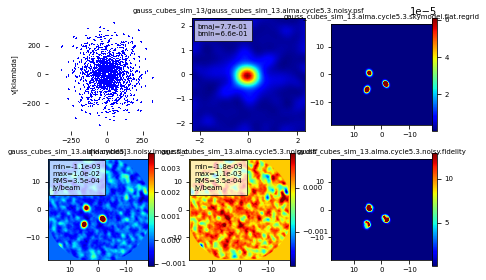

In [2]:
start = time.time()
i = 0
data_dir = 'test_data'
file = 'gauss_cube_' + str(i) + '.fits'
filename = os.path.join(data_dir, file)
j = 1
simalma(
    project = 'gauss_cubes_sim_'+str(i),
	dryrun = False,
	skymodel  = filename,
	inbright = "0.001Jy/pix",
	indirection = "J2000 03h59m59.96s -34d59m59.50s",
	incell = "0.1arcsec",
	incenter = "230GHz",
	inwidth = "10MHz",
	antennalist = ["alma.cycle5.3.cfg"],
	totaltime = "720s",
	mapsize="0arcsec",
	imsize=0,
	pwv = 0.8,
	niter= 0,
	overwrite=True
)

exportfits(imagename='gauss_cubes_sim_'+str(i)+'/gauss_cubes_sim_'+str(i)+'.alma.cycle5.3.noisy.image', fitsimage='gauss_cubes_sim_'+str(i)+'/gauss_cube_sim_'+str(i)+'.dirty.fits')
exportfits(imagename='gauss_cubes_sim_'+str(i)+'/gauss_cubes_sim_'+str(i)+'.alma.cycle5.3.skymodel', fitsimage='gauss_cubes_sim_'+str(i)+'/gauss_cube_sim_'+str(i)+'.skymodel.fits')

os.system('cp gauss_cubes_sim_'+str(i)+'/gauss_cube_sim_'+str(i)+'.dirty.fits {}/'.format(data_dir))
#os.system('cp gauss_cubes_sim_'+str(i)+'/gauss_cube_sim_'+str(i)+'.tclean.fits gauss_cubes/')
os.system('cp gauss_cubes_sim_'+str(i)+'/gauss_cube_sim_'+str(i)+'.skymodel.fits {}/'.format(data_dir))
print(f'Execution took {time.time() - start} seconds')

(1, 128, 360, 360)


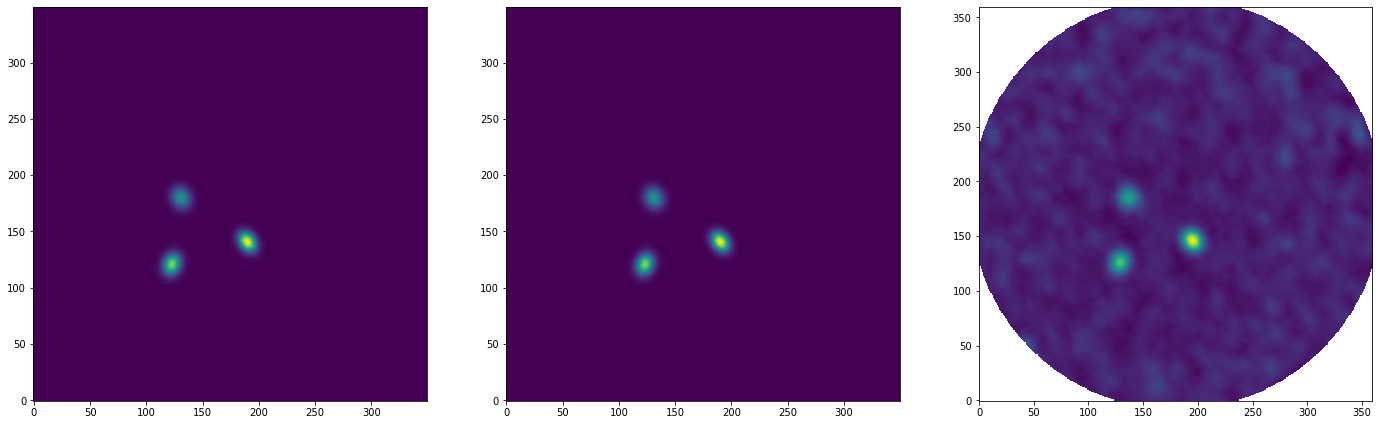

-0.0028861824 1.2767665


In [3]:
cube = fits.open(filename)[0].data
image = np.sum(cube, axis=0)
dirty = fits.open(os.path.join(data_dir, 'gauss_cube_sim_{}.dirty.fits'.format(str(j))))
dcube = dirty[0].data
print(dcube.shape)
dimage = np.sum(dcube[0], axis=0)
skymodel = fits.open(os.path.join(data_dir, 'gauss_cube_sim_{}.skymodel.fits'.format(str(j))))
scube = skymodel[0].data
simage = np.sum(scube[0], axis=0)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3 * 8, 8))
ax[0].imshow(image, origin='lower')
ax[1].imshow(simage, origin='lower')
ax[2].imshow(dimage, origin='lower')
plt.show()
print(np.mean(dimage[64:-64, 64:-64]), np.max(dimage[64:-64, 64:-64]))
